In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from RRNN import RRNN
import numpy as np
import matplotlib.pyplot as plt
from pyNN.utility.plotting import Figure, Panel

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.



## Le ring feed-forward face au ring récurrent

### Différences dans les motifs d'activité

Ici, nous montrons les différences d'activité entre un ring avec une connectivité feed- forward et un ring possédant une connectivité récurrente. La population excitatrice d'un ring récurrent bien accordé doit représenter de façon précise l'orientation soumise en entrée même si la distribution d'orientation à une grande largeur de bande. 

Pour vérifier cela, nous paramétrons l'activité des neurones de la population source de telle sorte que celle-ci représente une orientation de contraste de 90° et que la largeur de bande de la distribution soumise soit de 40°. Nous générons alors les rasterplots des trois populations du ring feed-forward ainsi que du ring récurrent.

Si l'on s'intéresse à l'activité de la population excitatrice pour chacun des deux types de ring, nous observons bien que le ring feed-forward reproduit l'activité de la population d'entrée alors que le ring récurrent présente une activité plus locale. Et, puisque les neurones du ring sont organisés selon leur préference à l'orientation, cela signifie que la connectivité récurrente entraine une représentation de l'orientation plus précise. Ainsi la réponse du ring recurrent est plus robuste à l'inhomogénéité de l'orientation présentée.

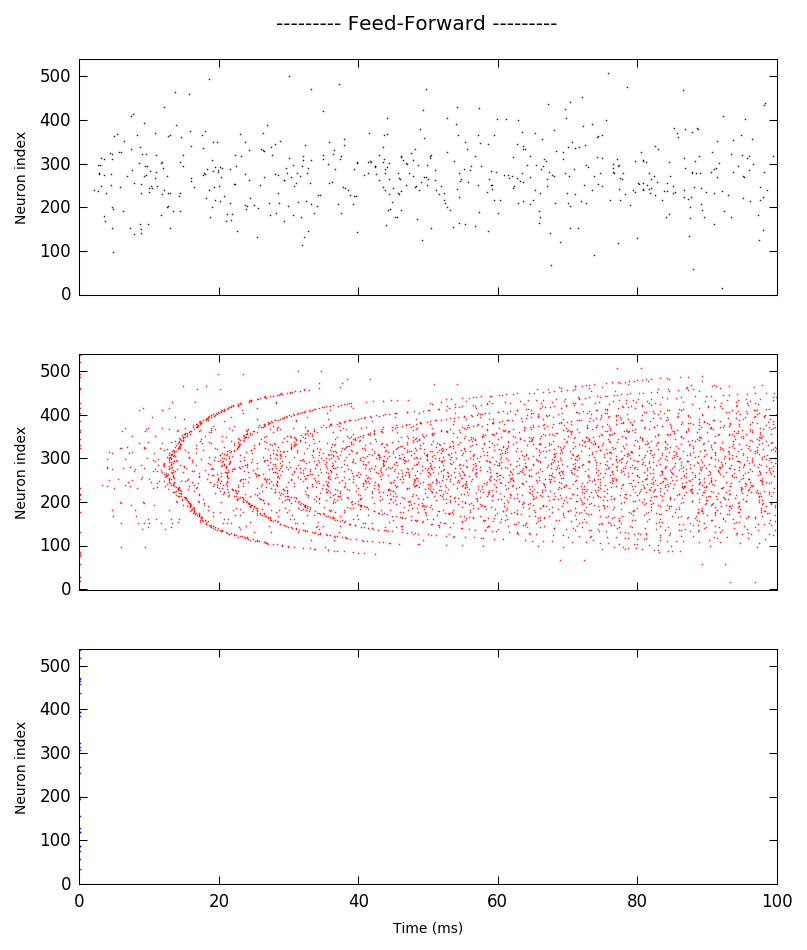

In [2]:
bw = 40.
markersize = .5
net = RRNN(ring=True, recurrent=False)
net.sim_params['b_input'] = bw
net.model()
title = 'Feed-Forward'

fig = Figure(Panel(net.spikesP.spiketrains, xticks=False, yticks=True, ylabel="input", color='k', markersize=markersize), #, line_properties=line_properties
            Panel(net.spikesE.spiketrains, xticks=False, yticks=True, ylabel="Excitatory", color='r', markersize=markersize),
            Panel(net.spikesI.spiketrains, xlabel="Time (ms)", xticks=True, yticks=True, color='b', ylabel="Inhibitory", markersize=markersize),
            title='--------- {} ---------'.format(title))

fig.fig.savefig("../figs/ringFF.png", dpi = 600)

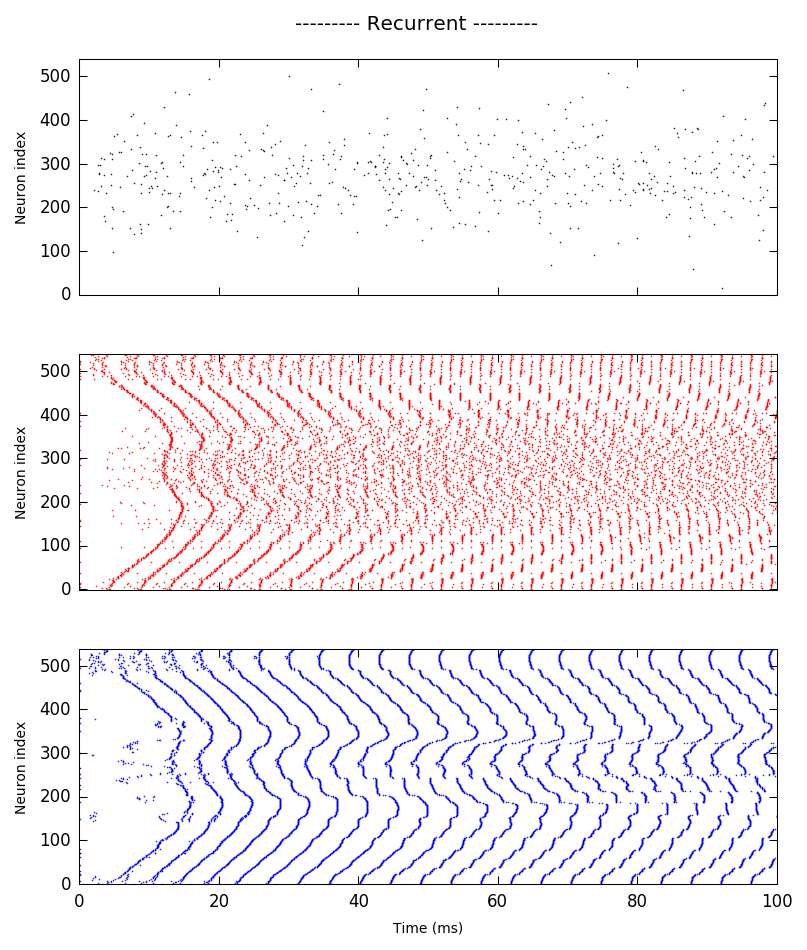

In [3]:
net = RRNN(ring = True, recurrent=True)
net.sim_params['b_input'] = bw
net.model()
title = 'Recurrent'

fig = Figure(Panel(net.spikesP.spiketrains, xticks=False, yticks=True, ylabel="input", color='k', markersize=markersize), #, line_properties=line_properties
            Panel(net.spikesE.spiketrains, xticks=False, yticks=True, ylabel="Excitatory", color='r', markersize=markersize),
            Panel(net.spikesI.spiketrains, xlabel="Time (ms)", xticks=True, yticks=True, color='b', ylabel="Inhibitory", markersize=markersize),
            title='--------- {} ---------'.format(title))

fig.fig.savefig("../figs/ringRecurrent.png", dpi = 600)